# Programming Assignment : SVM
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for classification problem. We are using Logistic Regression to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing the dataset:
The dataset we are using for this assignment is taken from UCI Machine Learning Repository. The dataset consists of Attributes/Factors that contribute to prediction of Diabetic Retinopathy(DR) in a diabetic patient. Given some predictors, we need to predict the value of target variable i.e. DR or Non-DR case. The dataset is given in the file data1.csv  

In [35]:
# Read the file into a pandas data frame.
df = pd.read_csv('Cryotherapy.csv')
df

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
5,1,41,8.00,2,2,20,1
6,1,36,11.00,2,1,8,0
7,1,59,3.50,3,3,20,0
8,1,20,4.50,12,1,6,1
9,2,34,11.25,3,3,150,0


In [3]:
# There can be some columns which may have missing values. So, we are removing those columns from our dataset.
df1 = df.dropna(axis = 1)

In [4]:
# Converting the df1 data frame into a numpy array named df2. Use values method of dataframes.
df2 = df1.values
df2.shape

(90, 7)

In [5]:
# Select all rows and first 6 columns as X from df2.
X = df2[:,0:6]
# Select all rows and last column as Y from df2.
Y = df2[:,df2.shape[1]-1]

In [6]:
# Splitting the dataset into training and test data.
# Select first 45 rows as training dataset and the remaining rows as test dataset.
X_train = X[0:45]
Y_train = Y[0:45]
X_test = X[45:90]
Y_test = Y[45:90]

# Logistic Regression
First we will fit the dataset using a logistic regression model.

# Logistic Regression with Lasso(L1) Regularization.
Read the comments in the below cell carefully.
Try different values of parameter C.

In [7]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

In [8]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

In [9]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

In [10]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    logreg = linear_model.LogisticRegression('L1',C = c,solver='saga')
    
    # Fit the model on the training set.
    logreg.fit(X_train,Y_train)
    
    # Find the prediction on training set.
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set.
    Yhat_test = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg.append(c)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222


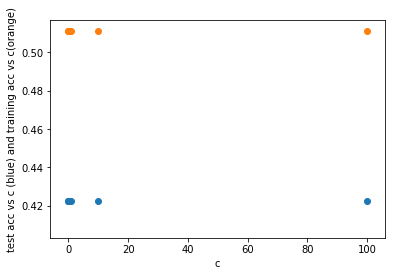

In [11]:
# Call the above function i.e. logreg_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
logreg_model(0.0001, X_train, Y_train, X_test, Y_test)
logreg_model(0.001, X_train, Y_train, X_test, Y_test)
logreg_model(0.01, X_train, Y_train, X_test, Y_test)
logreg_model(0.1, X_train, Y_train, X_test, Y_test)
logreg_model(1, X_train, Y_train, X_test, Y_test)
logreg_model(10, X_train, Y_train, X_test, Y_test)
logreg_model(100, X_train, Y_train, X_test, Y_test)

# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc vs c (blue) and training acc vs c(orange)')
plt.scatter(c_logreg,acc_test_logreg)

plt.grid()
plt.scatter(c_logreg,acc_train_logreg)

# Logistic Regression with Ridge(L2) Regularization.

In [12]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

In [13]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

In [14]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

In [15]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    logreg2 = linear_model.LogisticRegression(C=c)
    
    # Fit the model on the training set.
    logreg2.fit(X_train,Y_train)
    
    # Find the prediction on training set.
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction and accuracy on test set.
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg2.append(c)
    

Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.444444
Accuracy on training data = 0.577778
Accuracy on test data = 0.688889
Accuracy on training data = 0.755556
Accuracy on test data = 0.777778
Accuracy on training data = 0.911111
Accuracy on test data = 0.800000
Accuracy on training data = 0.888889
Accuracy on test data = 0.844444
Accuracy on training data = 0.955556
Accuracy on test data = 0.888889


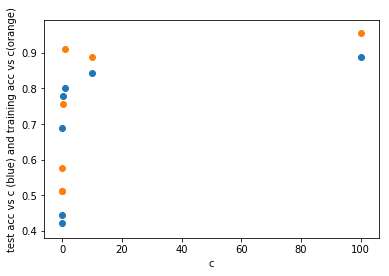

In [16]:
# Call the above function i.e. logreg2_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
logreg2_model(0.0001, X_train, Y_train, X_test, Y_test)
logreg2_model(0.001, X_train, Y_train, X_test, Y_test)
logreg2_model(0.01, X_train, Y_train, X_test, Y_test)
logreg2_model(0.1, X_train, Y_train, X_test, Y_test)
logreg2_model(1, X_train, Y_train, X_test, Y_test)
logreg2_model(10, X_train, Y_train, X_test, Y_test)
logreg2_model(100, X_train, Y_train, X_test, Y_test)

# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc vs c (blue) and training acc vs c(orange)')
plt.scatter(c_logreg2,acc_test_logreg2)

plt.grid()
plt.scatter(c_logreg2,acc_train_logreg2)


# Logistic Regression Using Polynomial Feature Transformation
Refer the given link to know how we can transform features.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# Create an object of PolynomialFeatures(2):
poly = PolynomialFeatures(2)

In [19]:
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [20]:
# Check the shapes of the new matrices.
# Originally, we had 19 features.
X_transformed_train.shape
X_transformed_test.shape

(45, 28)

Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222
Accuracy on training data = 0.511111
Accuracy on test data = 0.422222


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


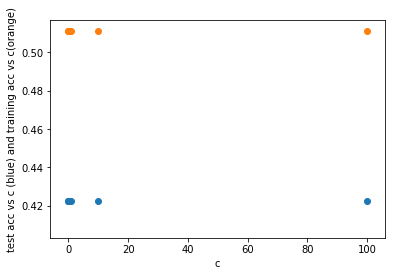

In [21]:
# Calling the logreg_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) because these lists are global variables.
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
# Call the function logreg_model.
logreg_model(0.0001, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg_model(0.001, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg_model(0.01, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg_model(0.1, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg_model(1, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg_model(10, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg_model(100, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc vs c (blue) and training acc vs c(orange)')
plt.scatter(c_logreg,acc_test_logreg)

plt.grid()
plt.scatter(c_logreg,acc_train_logreg)

acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

Accuracy on training data = 0.888889
Accuracy on test data = 0.755556
Accuracy on training data = 0.933333
Accuracy on test data = 0.777778
Accuracy on training data = 1.000000
Accuracy on test data = 0.755556
Accuracy on training data = 1.000000
Accuracy on test data = 0.755556
Accuracy on training data = 1.000000
Accuracy on test data = 0.755556
Accuracy on training data = 1.000000
Accuracy on test data = 0.755556
Accuracy on training data = 1.000000
Accuracy on test data = 0.733333


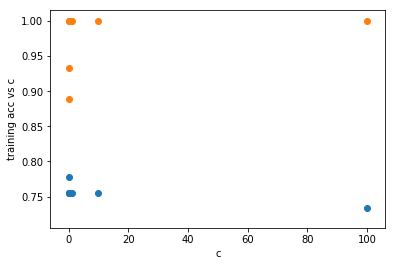

In [22]:
# Calling the logreg2_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) beacause these list are global varibles.
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
# Call the function logreg2_model.
logreg2_model(0.0001, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg2_model(0.001, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg2_model(0.01, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg2_model(0.1, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg2_model(1, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg2_model(10, X_transformed_train, Y_train, X_transformed_test, Y_test)
logreg2_model(100, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc vs c')
plt.scatter(c_logreg2,acc_test_logreg2)

plt.grid()
plt.xlabel('c')
plt.ylabel('training acc vs c')
plt.scatter(c_logreg2,acc_train_logreg2)

# Note:
<u>Do not</u> use these transformed features for the further part of the assignment. Use the X_train, Y_train, X_test and Y_test matrices.

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [23]:
acc_train_svm_linear = []

In [24]:
acc_test_svm_linear = []

In [25]:
c_svm_linear = []

In [26]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train,Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)
    

Accuracy = 0.688889
Accuracy = 0.688889
Accuracy = 0.777778
Accuracy = 0.822222
Accuracy = 0.866667
Accuracy = 0.888889
Accuracy = 0.933333
Accuracy = 0.866667
Accuracy = 0.933333
Accuracy = 0.866667
Accuracy = 0.933333
Accuracy = 0.888889


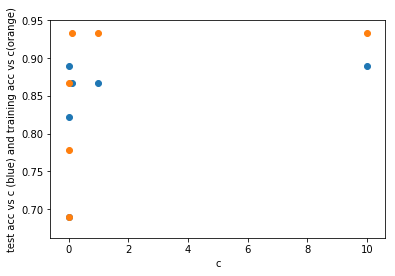

In [27]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
svm_linear(0.0001)
svm_linear(0.001)
svm_linear(0.01)
svm_linear(0.1)
svm_linear(1)
svm_linear(10)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

plt.grid()
plt.xlabel('c')
plt.ylabel('test acc vs c (blue) and training acc vs c(orange)')
plt.scatter(c_svm_linear,acc_test_svm_linear)

plt.grid()
plt.scatter(c_svm_linear,acc_train_svm_linear)

Change the value of parameter C above and see the difference in the results.

# SVM using Radial Basis Function(RBF) Kernel.

In [28]:
# Complete the function below.
# g is the value of gamma. 
def svm_rbf(c, g):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'rbf', value of C = c and rbf paramter gamma = g.
    svc_rbf = svm.SVC(probability = False,kernel='rbf', C = c, gamma = g)
    
    # Fit the classifier on the training set.
    svc_rbf.fit(X_train,Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc = np.mean(Yhat_svc_rbf_train == Y_train)
    print('Accuracy = {0:f}'.format(acc))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc = np.mean(Yhat_svc_rbf_test == Y_test)
    print('Accuracy = {0:f}'.format(acc))
  

In [29]:
# Call the above function i.e. svm_rbf with different values of parameter 'c' and 'g'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
svm_rbf(0.001, 0.001)
svm_rbf(0.01, 0.001)
svm_rbf(1, 0.001)
svm_rbf(1, 1)
svm_rbf(0.001, 1)
svm_rbf(0.001, 10)
svm_rbf(0.001, 100)

Accuracy = 0.511111
Accuracy = 0.422222
Accuracy = 0.511111
Accuracy = 0.422222
Accuracy = 0.800000
Accuracy = 0.711111
Accuracy = 1.000000
Accuracy = 0.533333
Accuracy = 0.511111
Accuracy = 0.422222
Accuracy = 0.511111
Accuracy = 0.422222
Accuracy = 0.511111
Accuracy = 0.422222


Change the value of parameter C and gamma above and see the difference in the results. 

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [30]:
acc_train_svm_poly = []

In [31]:
acc_test_svm_poly = []

In [32]:
c_svm_poly = []

In [33]:
def svm_polynomial(c):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'poly' , value of C = c.
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train 
    B = Y_train  
    C = X_test   
    D = Y_test
    
    # Fit the classifier on the training set.
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A,B)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    acc_train_svm_poly.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    acc_test_svm_poly.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)
    
    

Accuracy = 0.933333
Accuracy = 0.733333
Accuracy = 0.977778
Accuracy = 0.755556
Accuracy = 1.000000
Accuracy = 0.755556
Accuracy = 1.000000
Accuracy = 0.755556
Accuracy = 1.000000
Accuracy = 0.755556


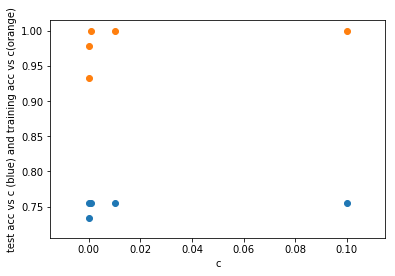

In [34]:
# Call the above function i.e. svm_poly with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
svm_polynomial(0.00001)
svm_polynomial(0.0001)
svm_polynomial(0.001)
svm_polynomial(0.01)
svm_polynomial(0.1)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc vs c (blue) and training acc vs c(orange)')
plt.scatter(c_svm_poly,acc_test_svm_poly)

plt.grid()
plt.scatter(c_svm_poly,acc_train_svm_poly)

Change the value of parameter C and see the difference in the results.

# Repeating the Assignment with 2 more Datasets:
1) Cryotherapy.csv (Predict result of treatment using 6 predictors).
https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+<br>
2) Immunotherapy.csv (Predict result of treatment using 7 predictors).
https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset <br>
You have to repeat the full assignment with 2 more different datasets. You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
You have to write this for all the 3 datasets in a single pdf file. 
Do not write explainations, just discuss your results / observations point to point. 